In [39]:
import pandas as pd
from seaborn import load_dataset
import numpy as np

In [6]:
iris = load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
iris['species'] = encoder.fit_transform(iris['species'])
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df = iris[iris['species']!=0][['sepal_width','petal_length','species']]
df

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

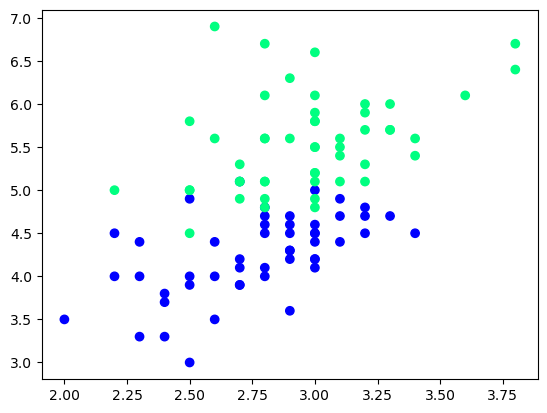

In [14]:
plt.scatter(x=df['sepal_width'],y=df['petal_length'],c=df['species'],cmap='winter')

In [15]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [16]:
df_train

,sepal_width,petal_length,species
90,2.6,4.4,1
132,2.8,5.6,2
127,3.0,4.9,2
80,2.4,3.8,1
56,3.3,4.7,1
117,3.8,6.7,2
107,2.9,6.3,2
89,2.5,4.0,1
92,2.6,4.0,1
121,2.8,4.9,2


In [18]:
x_train,y_train = df_train.iloc[:,:-1].values,df_train.iloc[:,-1].values
x_test,y_test = df_test.iloc[:,:-1].values,df_test.iloc[:,-1].values

### Case 1 - bagging

In [32]:
# data for decision tree 1
def construct_data():
    df_bag = df_train.sample(8,replace=True)
    x = df_bag.iloc[:,:-1]
    y = df_bag.iloc[:,-1]
    # df_bag
    return x,y

In [33]:
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

def evaluate(dt,x,y):
    dt.fit(x,y)
    plot_tree(dt)
    plt.show()
    plot_decision_regions(x.values,y.values,clf=dt,legend=2)
    y_pred = dt.predict(x_test)
    print(accuracy_score(y_pred,y_test))

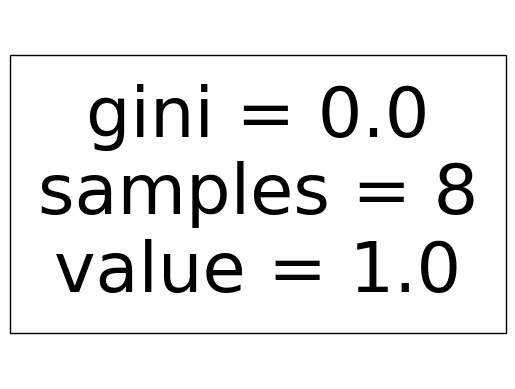

/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.2


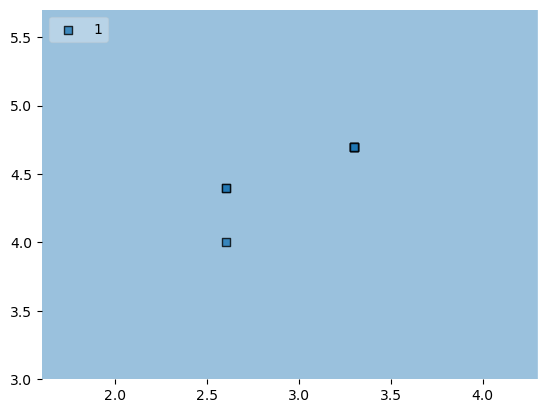

In [34]:
from sklearn.tree import DecisionTreeClassifier
x,y = construct_data()
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1,x,y)

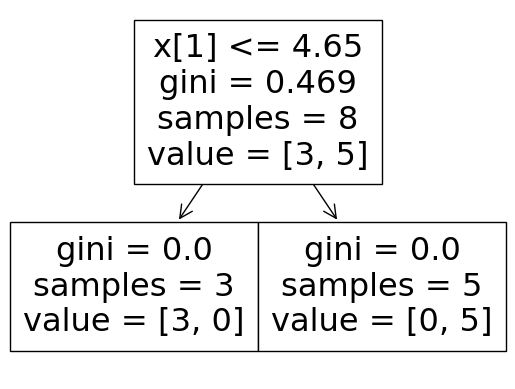

/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


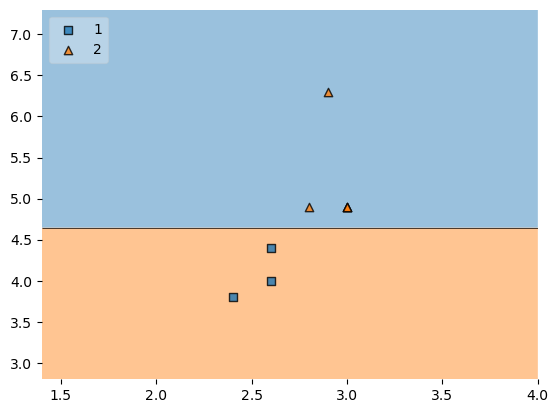

In [35]:
# data for decison tree 2
x,y = construct_data()
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,x,y)

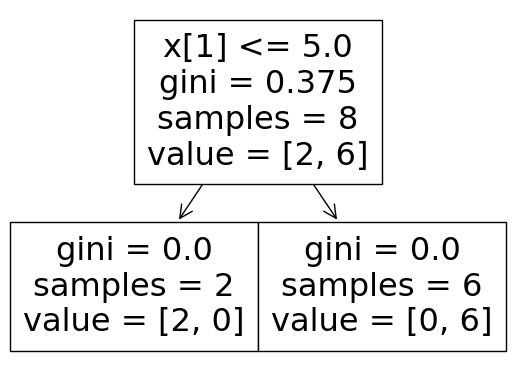

/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


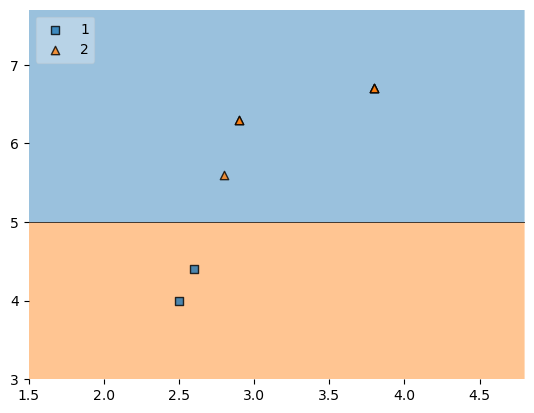

In [36]:
x,y = construct_data()
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,x,y)

In [37]:
df_test

,sepal_width,petal_length,species
143,3.2,5.9,2
137,3.1,5.5,2
129,3.0,5.8,2
142,2.7,5.1,2
68,2.2,4.5,1


In [42]:
## predict
print("dt_bag1",dt_bag1.predict(np.array([[3.2,5.9]])))
print("dt_bag2",dt_bag2.predict(np.array([[3.2,5.9]])))
print("dt_bag3",dt_bag3.predict(np.array([[3.2,5.9]])))
# take mode value as final prediction

dt_bag1 [1]
dt_bag2 [2]
dt_bag3 [2]


/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Pasting

In [43]:
def construct_data():
    df_bag = df_train.sample(8)
    x = df_bag.iloc[:,:-1]
    y = df_bag.iloc[:,-1]
    # df_bag
    return x,y

### Random subspace

In [44]:
def construct_data():
    df_bag = df_train.sample(2,axis=1)
    x = df_bag.iloc[:,:-1]
    y = df_bag.iloc[:,-1]
    # df_bag
    return x,y

### random patches

In [45]:
# both row sampling and col smapling

In [48]:
df.sample(8,replace=True).sample(2,replace=True,axis=1)

,petal_length,sepal_width
132,5.6,2.8
139,5.4,3.1
102,5.9,3.0
55,4.5,2.8
144,5.7,3.3
75,4.4,3.0
126,4.8,2.8
127,4.9,3.0
